In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Utilities as U
from mppi.Calculators import Tools
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
omp = 1
mpi = 4

# Analysis of the band structure with QuantumESPRESSO

We compute the band structure of Silicon and Gallium arsenide and graphene using the tools of the 
QuantumESPRESSO and Yambo packages.

In [4]:
run_dir = 'Pw_bands'

## Band structure of GaAs

The first step consists in a scf computation 

In [5]:
scf_prefix = 'gaas_scf'
nscf_prefix = 'gaas_nscf'
bands_prefix = 'gaas_bands'

In [6]:
inp = I.PwInput(file='IO_files/gaas_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
#inp

In [7]:
rr = C.RunRules(mpi=mpi,omp_num_threads=omp)
code = C.QeCalculator(rr)
code.global_options()

Initialize a QuantumESPRESSO calculator with scheduler direct


{'scheduler': 'direct',
 'mpi': 4,
 'omp_num_threads': 1,
 'executable': 'pw.x',
 'skip': True,
 'clean_restart': True,
 'dry_run': False,
 'wait_end_run': True,
 'activate_BeeOND': False,
 'verbose': True}

In [8]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Skip the run of gaas_scf


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_scf.save/data-file-schema.xml'

Before performing the bands computation we make an nscf computation on a regular kpath, this will be useful as input
for other tutorials of the package.

In [9]:
inp.set_nscf(8,force_symmorphic=True) #use force_symmorphic = True since this computation is used as input of a Yambo computation later
inp.set_prefix(nscf_prefix)
inp.set_kpoints(points=[8,8,8])
#inp

In [10]:
code.run(input=inp,run_dir=run_dir,name=nscf_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

Skip the run of gaas_nscf
The folder /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf.save already exists. Source_dir Pw_bands/gaas_scf.save not copied


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [11]:
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

The high symmetry points for some lattice structure are also written in the Constants module of the Utilities, for instance

In [12]:
U.Constants.high_sym_fcc

{'G': [0.0, 0.0, 0.0],
 'X': [0.0, 0.0, 1.0],
 'L': [0.5, 0.5, 0.5],
 'K': [0.0, 1.0, 1.0],
 'W': [1.0, 0.5, 0.0]}

In [13]:
klist = C.Tools.build_pw_kpath(L,G,X,K,G,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [0.0, 0.0, 1.0, 30],
 [0.0, 1.0, 1.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [14]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',klist=klist)
#inp

In [15]:
results_gaas = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')
results_gaas

Skip the run of gaas_bands
The folder /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_bands.save already exists. Source_dir Pw_bands/gaas_scf.save not copied


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_bands.save/data-file-schema.xml'

Once that the computation is over we can create an instance of BandStructure. The gap can be set when we init the class

In [16]:
results_gaas

'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_bands.save/data-file-schema.xml'

In [34]:
bands_gaas = U.BandStructure.from_Pw(results_gaas,high_sym,set_gap=1.42) #,

Apply a scissor of 1.1944603644894034 eV


The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

It contains also a plot method that show the band structure

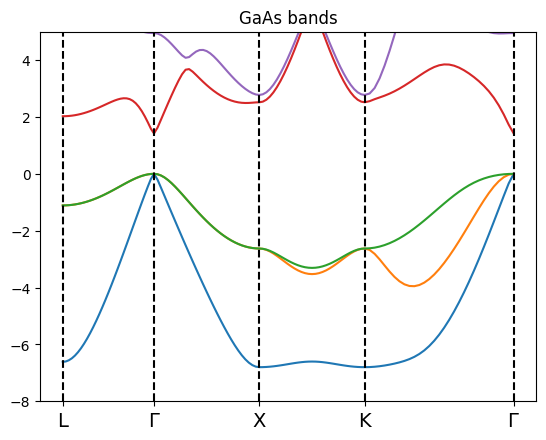

In [35]:
%matplotlib inline
plt.title('GaAs bands')
plt.ylim(-8,5)
bands_gaas.plot(plt,selection=[1,2,3,4,5])

In this case the class build the value of curvilinear abscissa along the paht from the 
distance among the kpoints on which the QE calculation is performed.

In [36]:
bands_gaas.get_kpath()

array([0.        , 0.02886751, 0.05773503, 0.08660254, 0.11547005,
       0.14433757, 0.17320508, 0.20207259, 0.23094011, 0.25980762,
       0.28867513, 0.31754265, 0.34641016, 0.37527767, 0.40414519,
       0.4330127 , 0.46188022, 0.49074773, 0.51961524, 0.54848276,
       0.57735027, 0.60621778, 0.6350853 , 0.66395281, 0.69282032,
       0.72168784, 0.75055535, 0.77942286, 0.80829038, 0.83715789,
       0.8660254 , 0.89935874, 0.93269207, 0.9660254 , 0.99935874,
       1.03269207, 1.0660254 , 1.09935874, 1.13269207, 1.1660254 ,
       1.19935874, 1.23269207, 1.2660254 , 1.29935874, 1.33269207,
       1.3660254 , 1.39935874, 1.43269207, 1.4660254 , 1.49935874,
       1.53269207, 1.5660254 , 1.59935874, 1.63269207, 1.6660254 ,
       1.69935874, 1.73269207, 1.7660254 , 1.79935874, 1.83269207,
       1.8660254 , 1.89935874, 1.93269207, 1.9660254 , 1.99935874,
       2.03269207, 2.0660254 , 2.09935874, 2.13269207, 2.1660254 ,
       2.19935874, 2.23269207, 2.2660254 , 2.29935874, 2.33269

## Band structure of GaAs with spin-orbit coupling

We repeat the computation of the band structure of GaAs including the spin-orbit. To do so we use a full relativistic pseudopotential
that is able to include the spin-orbit. 

The first step consists in a scf computation 

In [42]:
scf_prefix = 'gaas_scf_so'
nscf_prefix = 'gaas_nscf_so'
bands_prefix = 'gaas_bands_so'

In [43]:
inp = I.PwInput('IO_files/gaas_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(80)
inp.set_spinorbit()
inp.set_kpoints(points = [6.,6.,6.])
inp.add_atom('Ga','Ga_rel.pz-rrkj3.UPF')
inp.add_atom('As','As_rel.pz-rrkj3.UPF')
inp

{'control': {'calculation': "'scf'",
  'verbosity': "'high'",
  'prefix': "'gaas_scf_so'",
  'outdir': "'./'",
  'pseudo_dir': "'../pseudos'"},
 'system': {'force_symmorphic': '.false.',
  'occupations': "'fixed'",
  'ibrav': 2,
  'celldm(1)': 10.677,
  'ntyp': 2,
  'nat': 2,
  'ecutwfc': 80,
  'lspinorb': '.true.',
  'noncolin': '.true.'},
 'electrons': {'diago_full_acc': '.false.', 'conv_thr': 1e-08},
 'ions': {},
 'cell': {},
 'atomic_species': {'Ga': ['1.0', 'Ga_rel.pz-rrkj3.UPF'],
  'As': ['1.0', 'As_rel.pz-rrkj3.UPF']},
 'atomic_positions': {'type': 'alat',
  'values': [['Ga', [0.0, 0.0, 0.0]], ['As', [0.25, 0.25, 0.25]]]},
 'kpoints': {'type': 'automatic',
  'values': ([6.0, 6.0, 6.0], [0.0, 0.0, 0.0])},
 'cell_parameters': {},
 'file': 'IO_files/gaas_scf.in'}

In [44]:
rr = C.RunRules(mpi=mpi,omp_num_threads=omp)
code = C.QeCalculator(rr)

Initialize a QuantumESPRESSO calculator with scheduler direct


In [45]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Skip the run of gaas_scf_so


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_scf_so.save/data-file-schema.xml'

Before performing the bands computation we make an nscf computation on a regular kpath, this will be useful for the bands analysis 
using the ypp tools. 

We compute 12 bands since in this case the spin degeneracy is equal to 1 and there 8 occupied bands

In [46]:
inp.set_nscf(12,force_symmorphic=True) #use force_symmorphic = True since this computation is used as input of a Yambo computation later
inp.set_prefix(nscf_prefix)
#inp

In [47]:
code.run(input=inp,run_dir=run_dir,name=nscf_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

Skip the run of gaas_nscf_so
The folder /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf_so.save already exists. Source_dir Pw_bands/gaas_scf_so.save not copied


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf_so.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [48]:
hsp = U.Constants.high_sym_fcc

In [54]:
klist = C.Tools.build_pw_kpath(hsp['L'],hsp['G'],hsp['X'],hsp['K'],hsp['G'],numstep=20)
klist

[[0.5, 0.5, 0.5, 20],
 [0.0, 0.0, 0.0, 20],
 [0.0, 0.0, 1.0, 20],
 [0.0, 1.0, 1.0, 20],
 [0.0, 0.0, 0.0, 0]]

In [57]:
inp.set_bands?

Signature:
inp.set_bands(
    nbnd,
    conv_thr=1e-08,
    diago_full_acc=False,
    force_symmorphic=False,
    verbosity='high',
)
Docstring:
Set the variables for a bands calculation

Args:
    nbnd (:py:class:`int`) : number of bands
    conv_thr (:py:class:`float`) : the convergence threshold value
    diago_full_acc (:py:class:`bool`)
    force_symmorphic (:py:class:`bool`)
    verbosity (:py:class:`bool`)
File:      ~/Applications/MPPI/mppi/InputFiles/PwInput.py
Type:      method


In [59]:
inp.set_bands(12,conv_thr=1e-6,force_symmorphic=True)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',klist=klist)
inp

{'control': {'calculation': "'bands'",
  'verbosity': "'high'",
  'prefix': "'gaas_bands_so'",
  'outdir': "'./'",
  'pseudo_dir': "'../pseudos'"},
 'system': {'force_symmorphic': '.true.',
  'occupations': "'fixed'",
  'ibrav': 2,
  'celldm(1)': 10.677,
  'ntyp': 2,
  'nat': 2,
  'ecutwfc': 80,
  'lspinorb': '.true.',
  'noncolin': '.true.',
  'nbnd': 12},
 'electrons': {'diago_full_acc': '.false.', 'conv_thr': 1e-06},
 'ions': {},
 'cell': {},
 'atomic_species': {'Ga': ['1.0', 'Ga_rel.pz-rrkj3.UPF'],
  'As': ['1.0', 'As_rel.pz-rrkj3.UPF']},
 'atomic_positions': {'type': 'alat',
  'values': [['Ga', [0.0, 0.0, 0.0]], ['As', [0.25, 0.25, 0.25]]]},
 'kpoints': {'type': 'tpiba_b',
  'values': [[0.5, 0.5, 0.5, 20],
   [0.0, 0.0, 0.0, 20],
   [0.0, 0.0, 1.0, 20],
   [0.0, 1.0, 1.0, 20],
   [0.0, 0.0, 0.0, 0]]},
 'cell_parameters': {},
 'file': 'IO_files/gaas_scf.in'}

In [60]:
results_gaas_so = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

delete log file: Pw_bands/gaas_bands_so.log
delete folder: /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_bands_so.save
copy source_dir Pw_bands/gaas_scf_so.save in the /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_bands_so.save
run command: mpirun -np 4 pw.x -inp gaas_bands_so.in > gaas_bands_so.log
computation gaas_bands_so is running...


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


computation gaas_bands_so ended


Once that the computation is over we can create an instance of BandStructure

In [61]:
bands_gaas_so = U.BandStructure.from_Pw(results_gaas_so,hsp,set_gap=1.42)

Apply a scissor of 1.0018908645131264 eV


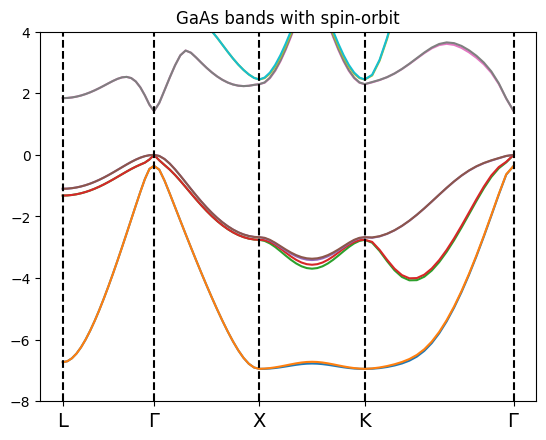

In [62]:
%matplotlib inline
plt.title('GaAs bands with spin-orbit')
plt.ylim(-8,4)
bands_gaas_so.plot(plt,selection=[2,3,4,5,6,7,8,9,10,11])

Note that in this case we need to display twice the bands respect to the previous example since each band accomodate only one electron in
a specific spin state. 

## Band structure of Silicon

The first step consists in a scf computation 

In [63]:
scf_prefix = 'si_scf'
bands_prefix = 'si_bands'

In [64]:
inp = I.PwInput(file='IO_files/si_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
#inp

In [66]:
rr = C.RunRules(mpi=mpi,omp_num_threads=omp)
code = C.QeCalculator(rr)
code.global_options()

Initialize a QuantumESPRESSO calculator with scheduler direct


{'scheduler': 'direct',
 'mpi': 4,
 'omp_num_threads': 1,
 'executable': 'pw.x',
 'skip': True,
 'clean_restart': True,
 'dry_run': False,
 'wait_end_run': True,
 'activate_BeeOND': False,
 'verbose': True}

In [67]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

run command: mpirun -np 4 pw.x -inp si_scf.in > si_scf.log
computation si_scf is running...


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


computation si_scf ended


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/si_scf.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [69]:
hsp = U.Constants.high_sym_fcc

In [72]:
klist = C.Tools.build_pw_kpath(hsp['L'],hsp['G'],hsp['X'],hsp['K'],hsp['G'],numstep=20)
klist

[[0.5, 0.5, 0.5, 20],
 [0.0, 0.0, 0.0, 20],
 [0.0, 0.0, 1.0, 20],
 [0.0, 1.0, 1.0, 20],
 [0.0, 0.0, 0.0, 0]]

In [73]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',klist=klist)
#inp

In [75]:
results_si = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

copy source_dir Pw_bands/si_scf.save in the /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/si_bands.save
run command: mpirun -np 4 pw.x -inp si_bands.in > si_bands.log
computation si_bands is running...


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


computation si_bands ended


Once that the computation is over we can create an instance of PwBands

In [77]:
bands_si = U.BandStructure.from_Pw(results_si,hsp,set_gap=1.2)

Apply a scissor of 0.6041599954868155 eV


It contains also a plot method that show the band structure

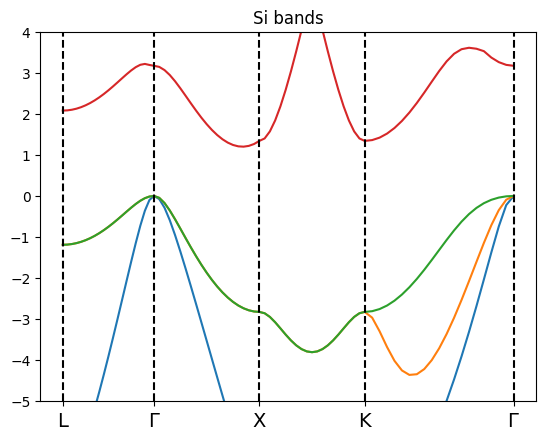

In [78]:
%matplotlib inline
plt.title('Si bands')
plt.ylim(-5,4)
bands_si.plot(plt,selection=[1,2,3,4])

## Band structure of Graphene

In [79]:
scf_prefix = 'graphene_scf'
nscf_prefix = 'graphene_nscf'
bands_prefix = 'graphene_bands'

The lattice is oriented with the zig-zag along the y axis. The basis vector are chosen as:

$$
a_1 = \frac{a}{2}(3,\sqrt{3},0) \, ,\quad a_2 = \frac{a}{2}(3,-\sqrt{3},0) \, ,\quad
a_3 = (0,0,\delta_z)
$$

Here $a$ represents the CC nn distance. The position of the atoms in the lattice is given by:

$$
A = (0,0,0) \, \qquad B = \frac{a}{2}(1,\sqrt{3},0)
$$

The lattice constant is given by $a_{lat} = \sqrt{3}a$.

The position of the high symmetry points of the reciprocal lattice (in units of $2\pi/a_{alat}$) are given by:

$$
M = (\frac{1}{\sqrt{3}},0) \, \quad
K = (\frac{1}{\sqrt{3}},\frac{1}{3}) 
$$

In [84]:
pseudo_pbe = 'C_pbe-20082014.UPF' #pbe
delta = 15 # Angstrom
a0 = 1.42495 # PBE cc equilibrium distance among nearest C atoms
engCutoff = 60 # Ry
numKpoints = 12

import numpy as np
a1 = [a0/2.*3.,a0/2.*np.sqrt(3.),0.]
a2 = [a0/2.*3.,-a0/2.*np.sqrt(3.),0.]
a3 = [0.,0.,delta]
A = [0.,0.,0.]
B = [a0/2.,a0/2.*np.sqrt(3.),0.]

In [87]:
inp = I.PwInput()
inp.set_scf()
inp.set_prefix(scf_prefix)
inp.set_pseudo_dir('../pseudos')
inp.add_atom(atom='C',pseudo_name=pseudo_pbe,mass=12.011)
inp.set_atoms_number(2)
inp.set_energy_cutoff(engCutoff)
inp.set_atomic_positions([['C',A],['C',B]],type='angstrom')
inp.set_lattice(ibrav=0,cell_vectors=[a1,a2,a3],cell_units='angstrom')
inp.set_occupations(occupations='smearing',degauss=50.)
inp.set_kpoints(points = [numKpoints,numKpoints,1])
inp

{'control': {'calculation': "'scf'",
  'verbosity': "'high'",
  'prefix': "'graphene_scf'",
  'outdir': "'./'",
  'pseudo_dir': "'../pseudos'"},
 'system': {'force_symmorphic': '.false.',
  'ntyp': '1',
  'nat': '2',
  'ecutwfc': 60,
  'ibrav': 0,
  'occupations': "'smearing'",
  'smearing': "'fermi-dirac'",
  'degauss': 0.00367493225078649},
 'electrons': {'diago_full_acc': '.false.', 'conv_thr': 1e-08},
 'ions': {},
 'cell': {},
 'atomic_species': {'C': [12.011, 'C_pbe-20082014.UPF']},
 'atomic_positions': {'type': 'angstrom',
  'values': [['C', [0.0, 0.0, 0.0]],
   ['C', [0.712475, 1.2340428991226358, 0.0]]]},
 'kpoints': {'type': 'automatic', 'values': ([12, 12, 1], [0.0, 0.0, 0.0])},
 'cell_parameters': {'type': 'angstrom',
  'values': [[2.137425, 1.2340428991226358, 0.0],
   [2.137425, -1.2340428991226358, 0.0],
   [0.0, 0.0, 15]]}}

In [88]:
rr = C.RunRules(mpi=mpi,omp_num_threads=omp)
code = C.QeCalculator(rr)
#code.global_options()

Initialize a QuantumESPRESSO calculator with scheduler direct


In [89]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

delete log file: Pw_bands/graphene_scf.log
run command: mpirun -np 4 pw.x -inp graphene_scf.in > graphene_scf.log
computation graphene_scf is running...


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


computation graphene_scf ended


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/graphene_scf.save/data-file-schema.xml'

We perfrom also a nscf computation on a regular grid of kpoint. Results of this computation are used by the
other tutorials of the package

In [91]:
inp.set_nscf(8)
inp.set_prefix(nscf_prefix)
#inp

In [93]:
code.run(input=inp,run_dir=run_dir,name=nscf_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

copy source_dir Pw_bands/graphene_scf.save in the /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/graphene_nscf.save
run command: mpirun -np 4 pw.x -inp graphene_nscf.in > graphene_nscf.log
computation graphene_nscf is running...


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


computation graphene_nscf ended


'/home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/graphene_nscf.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [94]:
G = [0.,0.,0.]
M = [1./np.sqrt(3.),0.,0.]
K = [1./np.sqrt(3.),1./3.,0.]

# useful to label the high-sym point on the path
high_sym = {'G':G,'K':K,'M':M}

In [96]:
klist = C.Tools.build_pw_kpath(G,M,K,G,numstep=30)
#klist

In [97]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',klist=klist)
#inp

In [98]:
results_gra = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

copy source_dir Pw_bands/graphene_scf.save in the /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/graphene_bands.save
run command: mpirun -np 4 pw.x -inp graphene_bands.in > graphene_bands.log
computation graphene_bands is running...


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


computation graphene_bands ended


Once that the computation is over we can create an instance of PwBands

In [99]:
bands_gra = U.BandStructure.from_Pw(results_gra,high_sym)

It contains also a plot method that show the band structure

In [100]:
bands_gra.get_high_sym_positions()

(['$\\Gamma$', '$\\Gamma$', 'K', 'M'],
 [0.0, 1.5773502657018026, 0.9106835999999987, 0.57735027])

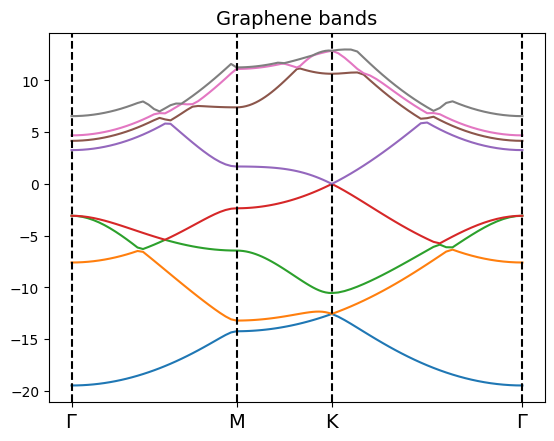

In [101]:
%matplotlib inline
plt.title('Graphene bands',size=14)
#plt.ylim(-6,8)
bands_gra.plot(plt) #,selection=[0,1,2,3,4,5,6,7]

# Analysis of the band structure with ypp

In [4]:
run_dir = 'Ypp_bands'

Now we analyze the band structure using the post processing tools of ypp. 

## Band structure of GaAs with spin-orbit coupling

As an example we consider the GaAs band structure with spin-orbit coupling. 

We perform a ypp -s b computation starting from the .save of an nscf pw computation on a regular grid

In [5]:
source_dir = C.Tools.make_p2y('Pw_bands/gaas_bands_so.save')
source_dir

SAVE folder Pw_bands/gaas_bands_so.save/SAVE already present. No operations performed.


'Pw_bands/gaas_bands_so.save/SAVE'

In [107]:
C.Tools.init_yambo_run_dir(source_dir,run_dir)

Create folder path Ypp_bands
Create a symlink of Pw_bands/gaas_bands_so.save/SAVE in Ypp_bands
Build the r_setup in the run_dir path Ypp_bands


In [6]:
rr = C.RunRules(mpi=mpi,omp_num_threads=1)
code = C.YamboCalculator(rr,executable='ypp')
code.global_options()

Initialize a Yambo calculator with scheduler direct


{'scheduler': 'direct',
 'mpi': 4,
 'omp_num_threads': 1,
 'executable': 'ypp',
 'skip': True,
 'clean_restart': True,
 'dry_run': False,
 'wait_end_run': True,
 'activate_BeeOND': False,
 'verbose': True,
 'fatlog': False}

In [48]:
inp = I.YamboInput(args='ypp -s b -V qp',folder=run_dir,filename='ypp.in') 
inp

{'args': 'ypp -s b -V qp',
 'folder': 'Ypp_bands',
 'filename': 'ypp.in',
 'arguments': [],
 'variables': {'INTERP_Shell_Fac': [20.0, ''],
  'INTERP_NofNN': [1.0, ''],
  'OutputAlat': [0.0, ''],
  'BANDS_steps': [10.0, ''],
  'GfnQP_INTERP_NN': [1.0, ''],
  'GfnQP_INTERP_shells': [20.0, ''],
  'GfnQP_Wv_E': [0.0, 'eV'],
  'GfnQP_Wv_dos': [0.0, 'eV'],
  'GfnQP_Wc_E': [0.0, 'eV'],
  'GfnQP_Wc_dos': [0.0, 'eV'],
  'PROJECT_mode': 'none',
  'INTERP_mode': 'NN',
  'cooIn': 'rlu',
  'cooOut': 'rlu',
  'CIRCUIT_E_DB_path': 'none',
  'GfnQPdb': 'none',
  'GfnQP_DbGd_INTERP_mode': 'NN',
  'GfnQP_Z': [(1+0j), ''],
  'BANDS_bands': [[1, 12], ''],
  'GfnQP_E': [[0.0, 1.0, 1.0], ''],
  'GfnQP_Wv': [[0.0, 0.0, 0.0], ''],
  'GfnQP_Wc': [[0.0, 0.0, 0.0], '']}}

Set the input parameter to perform the band computation along a path

In [49]:
# set the coordinate of the high-sym points  (use crystal coordinates) to be consistent with th
# rlu choice in the cooIn and cooOut variables in the ypp input
G = [0.,0.,0.]
X = [0.,0.5,0.5]
L = [0.5,0.5,0.5]
K = [3./8.,3/4.,3/8.]
W = [1./4.,3./4.,1./2.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

# set the path (use the same path of the pw computation)
path = [L,G,X,K,G]
# set the number of intermediate points between two high-sym ones
bands_step = 20

In [51]:
# scissor
# inp['variables']['GfnQP_E'] = [1.0,1.0,1.0]

# band structure
inp.set_scalar_variables(INTERP_mode='NN')
inp.set_array_variables(BANDS_steps=bands_step,BANDS_kpts=path,INTERP_Shell_Fac=20)
#inp

In [52]:
results_ypp = code.run(run_dir=run_dir,input=inp,name='gaas_bands_so',skip=False)
results_ypp

delete folder: Ypp_bands/gaas_bands_so
run command: mpirun -np 4 ypp -F gaas_bands_so.in -J gaas_bands_so -C gaas_bands_so
computation gaas_bands_so is running...
computation gaas_bands_so ended
Run performed in 05s


{'output': {'magnetization_z_interpolated': 'Ypp_bands/gaas_bands_so/o-gaas_bands_so.magnetization_z_interpolated',
  'spin_factors_DN_interpolated': 'Ypp_bands/gaas_bands_so/o-gaas_bands_so.spin_factors_DN_interpolated',
  'magnetization_y_interpolated': 'Ypp_bands/gaas_bands_so/o-gaas_bands_so.magnetization_y_interpolated',
  'spin_factors_UP_interpolated': 'Ypp_bands/gaas_bands_so/o-gaas_bands_so.spin_factors_UP_interpolated',
  'bands_interpolated': 'Ypp_bands/gaas_bands_so/o-gaas_bands_so.bands_interpolated',
  'magnetization_x_interpolated': 'Ypp_bands/gaas_bands_so/o-gaas_bands_so.magnetization_x_interpolated'},
 'report': 'Ypp_bands/gaas_bands_so/r-gaas_bands_so_electrons_bnds',
 'dft': 'Ypp_bands/SAVE/ns.db1'}

Once that the computation is over we can create an instance of PwBands

In [53]:
U.BandStructure.from_Ypp?

Signature:
U.BandStructure.from_Ypp(
    results,
    high_sym_points=None,
    suffix='bands_interpolated',
)
Docstring:
Initialize the BandStructure class from the data dictionay of the result of a Ypp postprocessing.
The class make usage of the YamboParser of this package.

Args:
    results (:py:class:`dict`) : dictionary with the output of a Ypp computation
    high_sym_points(:py:class:`dict`) : dictionary with name and coordinates of the
                    high_sym_points of the path
    suffix (string) : specifies the suffix of the o- file use to build the bands
File:      ~/Applications/MPPI/mppi/Utilities/BandStructure.py
Type:      method


In [54]:
bands_ypp = U.BandStructure.from_Ypp(results_ypp,high_sym)

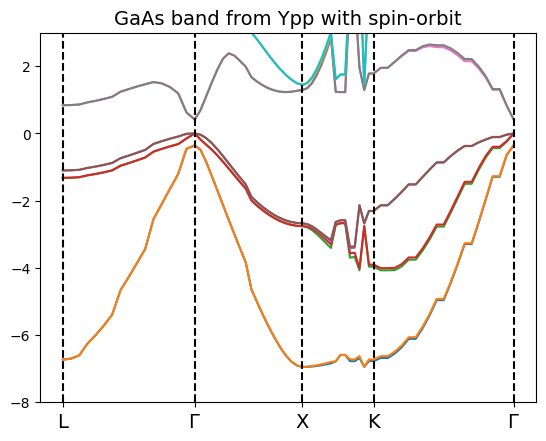

In [55]:
%matplotlib inline
plt.title('GaAs band from Ypp with spin-orbit',size=14)
plt.ylim(-8,3)
bands_ypp.plot(plt,selection=[2,3,4,5,6,7,8,9,10,11])

_Note that the NN interpolation method has been used, since the BOLTZ (which is the right one for the band structure evaluation) gives
an interpolation error at run time, to be fixed!_

The design of the plot method of the class allows us to plot bands coming from different calculations in the same plot.

For instance, we can show the effect of the spin-orbit on the valence band of GaAs

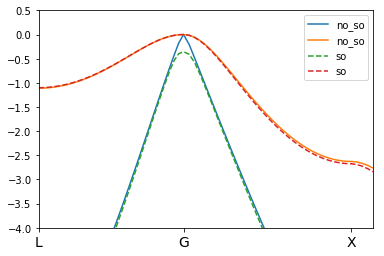

In [61]:
bands_gaas.plot(plt,selection= [1,3],label='no_so',show_vertical_lines=False)
bands_gaas_so.plot(plt,selection = [2,6],ls='--',label='so',show_vertical_lines=False)
plt.ylim(-4,0.5)
plt.xlim(0,2)
plt.legend()

The shift of the split-off band is visible.